# Background

Transjakarta adalah sistem Bus Rapid Transit (BRT) di Jakarta, Indonesia yang telah beroperasi sejak tahun 2004. Transjakarta memiliki panjang koridor lebih dari 390 km, menjadikannya jaringan BRT terpanjang di dunia yang didirikan untuk mengurangi kemacetan lalu lintas di kota dan meningkatkan transportasi publik. Sistem ini beroperasi di sepanjang beberapa koridor dan memiliki visi `Connecting the life of Hajarta`

Bus Transjakarta beroperasi di jalur steril dari kendaraan lainnya. Transjakarta memiliki banyak titik perhentian yang terletak di sepanjang koridor. Titik perhentian ini dilengkapi dengan fasilitas seperti area tunggu, area komersial, vending machine ticket, toilet dan lain sebagainya. 

Penumpang membayar tarif menggunakan sistem kartu atau memindai QR/barcode melalui Aplikasi Tije. Terdapat berbagai tarif berdasarkan jenis layanan.

Transjakarta bertujuan untuk terintegrasi dengan mode transportasi lain, seperti KRL commuter line, MRT, LRT dan layanan transportasi publik lainnya.

Transjakarta sudah sangat berkembang pesat telah mengalami ekspansi dan perbaikan sejak awal beroperasi, dengan tujuan membuat transportasi publik lebih efisien, handal, dan nyaman bagi penduduk Jakarta dan bisa menaikkan minat pelanggan yang menggunakan kendaraan pribadi untuk beralih menggunakan Transportasi publik. 

# Problem Statement

Pada pertengahan tahun 2023, indeks kemacetan Jakarta sudah mencapai 53%, dipicu oleh daerah yang padat penduduk dan mobilitas tinggi, dengan jumlah penduduk mencapai 10,6 juta jiwa. Transjakarta tetap menjadi solusi yang berkelanjutan untuk kemacetan yang persisten ini.

Untuk mendorong minat masyarakat dalam menggunakan transportasi umum, Transjakarta harus menyediakan layanan yang lebih aman dan nyaman dibandingkan dengan kendaraan pribadi. Layanan yang ditawarkan harus memprioritaskan kepuasan pelanggan dan berorientasi kepada kebutuhan pelanggan.

Sebagai seorang data analyst, saya akan mencoba menjawab pertanyaan:

**Bagaimana pelayanan operasional Transjakarta saat ini dan karakteristik pelanggan Transjakarta?**

 dan 
 
 **Bagaimana cara meningkatkan jumlah pelanggan Transjakarta dan meningkatkan kepuasan pelanggan untuk membuat lebih banyak orang menggunakan Transjakarta dan mengurangi kemacetan lalu lintas di Jakarta?**

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# Dataset

In [256]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Fundamental\Class\Capstone Module 2\Public Transportation Transaction - Transjakarta-20240104T055931Z-001\Public Transportation Transaction - Transjakarta\Transjakarta.csv', low_memory=False, sep = ",")
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


# Data Understanding dan Data Cleaning

In [257]:
print(f'Jumlah baris dan kolom di dataset adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  

In [258]:
### Di kolom ini menampilkan ringkasan statistik deskriptif pada dataset

In [259]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [260]:
# Menggunakan metode isna() untuk mencari nilai yang kosong dalam kolom tertentu
kolom_tujuan = 'corridorID'  # Ganti 'nama_kolom' dengan nama kolom yang ingin Anda periksa

nilai_kosong = df[df[kolom_tujuan].isnull()]
print(nilai_kosong)


              transID            payCardID payCardBank  \
7      XTKE052E5E87LN     3587341902618993         dki   
120    MCWO805A6Q66MX     3570416613897992         dki   
240    PTDK452M9A71XF      342370004909630      emoney   
250    OLZA217B5B95DK  4371940047525876160      brizzi   
257    GHEY769K9T55WF        4281653494791      online   
...               ...                  ...         ...   
37689  ZVAU363K8Z72QF     4235440226938980         dki   
37727  MGBX067C2V69EZ      213145593134816      emoney   
37770  RGLG273G3M96TE  4725638979751926133      brizzi   
37797  HBLN935K0C66OQ        4667337468542      online   
37838  GTLM961T1U29JA     4204405669287580         dki   

                     payCardName payCardSex  payCardBirthDate corridorID  \
7                Darmanto Rajasa          F              1991        NaN   
120         Gawati Damanik, S.E.          F              2010        NaN   
240        Kartika Habibi, S.Psi          M              1975        NaN   

In [261]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

## Delete coloumn

In [262]:
# Menggunakan drop untuk menghapus kolom
df = df.drop(['transID','stopStartSeq', 'stopEndSeq', 'tapInStops', 'tapOutStops'], axis=1)


In [263]:
# Konversi tipe data time 
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   payCardID         37900 non-null  int64         
 1   payCardBank       37900 non-null  object        
 2   payCardName       37900 non-null  object        
 3   payCardSex        37900 non-null  object        
 4   payCardBirthDate  37900 non-null  int64         
 5   corridorID        36643 non-null  object        
 6   corridorName      35970 non-null  object        
 7   direction         37900 non-null  float64       
 8   tapInStopsName    37900 non-null  object        
 9   tapInStopsLat     37900 non-null  float64       
 10  tapInStopsLon     37900 non-null  float64       
 11  tapInTime         37900 non-null  datetime64[ns]
 12  tapOutStopsName   36556 non-null  object        
 13  tapOutStopsLat    36556 non-null  float64       
 14  tapOutStopsLon    3655

Secara umum, kita bisa melihat bahwa:
* dataset hr_analytics memiliki 19 kolom dan 19.158 baris
* kolom `transID` berisikan kode transaksi, kolom ini dianggap tidak penting jadi hapus saja karena suah kolom `payCardID` berisikan id unik untuk tiap pelanggan. 
* kolom `stopStartSeq` dan kolom `stopEndSeq` dihapus saja karena tidak diperlukan untuk analisis data. 
* kolom `tapInStops` dan `tapOutStops`dihapus saja karena tidak diperlukan untuk analisis data. 
* kolom `tapinTime` dan `tapOutTime` memiliki tipe data object yang harusnya dalam bentuk datetime64ns


## Missing Value

In [264]:
# persentase missing value di tiap kolom
np.round(
    (df.isna().sum()/df.shape[0]*100),
    2
)

payCardID           0.00
payCardBank         0.00
payCardName         0.00
payCardSex          0.00
payCardBirthDate    0.00
corridorID          3.32
corridorName        5.09
direction           0.00
tapInStopsName      0.00
tapInStopsLat       0.00
tapInStopsLon       0.00
tapInTime           0.00
tapOutStopsName     3.55
tapOutStopsLat      3.55
tapOutStopsLon      3.55
tapOutTime          3.55
payAmount           2.66
dtype: float64

<Axes: >

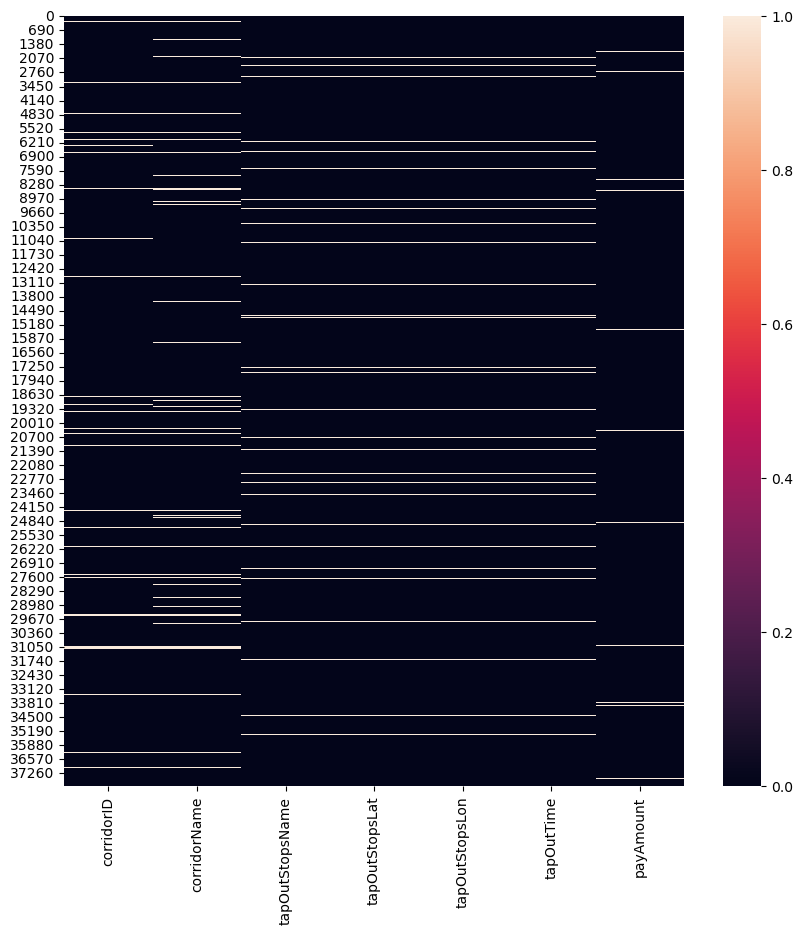

In [265]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','tapOutTime','payAmount']].isna())

Secara garis besar:  
* *missing value* di kolom `corridorID`, `corridorName`,`tapOutStopsName`,`tapOutStopsLat`,`tapOutStopsLon`,`tapOutTime`,`payAmount`, memiliki proporsi yang rendah (<10%), dengan missing value tertinggi ada di value `tapOutStop` mencapai 5.09%
* mengisi missing value dengan nilai modus (yang sering muncul)

In [266]:
mode_corridorID = df['corridorID'].mode()[0]  # Menghitung mode dari corridorID
df['corridorID'].fillna(mode_corridorID, inplace=True)  # Mengisi nilai yang hilang dengan mode

In [267]:
# Misalkan kolom 'corridorID' memiliki nilai yang tidak null
# Membuat mapping antara 'corridorID' dan 'corridorName' yang tidak null
mapping = df.dropna(subset=['corridorID', 'corridorName']).set_index('corridorID')['corridorName'].to_dict()

# Mengisi nilai yang hilang di 'corridorName' dengan 'corridorID' yang sesuai
df['corridorName'].fillna(df['corridorID'].map(mapping), inplace=True)

In [268]:
df = df.dropna(subset=['tapOutTime'])


In [269]:
# Hitung nilai modus dari kolom 'tapOutStopNames'
tapout_mode = df['tapOutStopsName'].mode()[0]

# Mengganti nilai yang hilang dengan nilai modus
df['tapOutStopsName'].fillna(tapout_mode, inplace=True)

In [270]:
# mengisi nilai 'tapOutStopsLat' dan 'tapOutStopsLong' dengan mengidentifikasi tapOutStopsName nya 
df['tapOutStopsLat'] = df.groupby('tapOutStopsName')['tapOutStopsLat'].transform(lambda x: x.fillna(x.mean()))
df['tapOutStopsLon'] = df.groupby('tapOutStopsName')['tapOutStopsLon'].transform(lambda x: x.fillna(x.mean()))

In [271]:
# mengisi nilai dengan memberikan ketentuan apabila ada layanan dengan kode 'JAK' maka tarifnya 0 
condition = df['corridorID'].str.contains('JAK', na=False)

# Memperbarui payamount untuk kode rute yang memenuhi kondisi
df.loc[condition, 'payAmount'] = 0


In [272]:
# persentase missing value di tiap kolom
np.round(
    (df.isna().sum()/df.shape[0]*100),
    2
)

payCardID           0.00
payCardBank         0.00
payCardName         0.00
payCardSex          0.00
payCardBirthDate    0.00
corridorID          0.00
corridorName        0.00
direction           0.00
tapInStopsName      0.00
tapInStopsLat       0.00
tapInStopsLon       0.00
tapInTime           0.00
tapOutStopsName     0.00
tapOutStopsLat      0.00
tapOutStopsLon      0.00
tapOutTime          0.00
payAmount           1.59
dtype: float64

In [273]:
#payAmount masih terindikasi missing value 
grouped_data = df.groupby('payAmount')['corridorID'].apply(list).reset_index()
grouped_data

,payAmount,corridorID
0,0.0,"[1T, JAK.46, JAK.88, JAK.16, JAK.02, 3B, BW9, JAK.15, JAK.112, JAK.43B, JAK.42, JAK.02, JAK.36, JAK.06, JAK.14, JAK.15, 3A, 3C, JAK.71, JAK.77, JAK.44, JAK.48B, JAK.19, JAK.75, JAK.52, JAK.37, JAK.31, 11M, JAK.43C, 2F, 3B, JAK.117, JAK.49, JAK.44, JAK.20, JAK.118, JAK.36, JAK.27, 4E, JAK.13, JAK.84, 2H, JAK.08, JAK.23, JAK.07, JAK.22, JAK.115, JAK.21, JAK.26, JAK.64, JAK.47, 12C, 2F, JAK.01, JAK.120, JAK.85, 11N, JAK.10, JAK.36, 2E, JAK.115, JAK.14, JAK.20, JAK.07, JAK.41, JAK.86, 3A, JAK.07, 2E, 9F, JAK.49, JAK.26, 11P, JAK.73, JAK.32, JAK.50, JAK.29, 3C, JAK.48A, JAK.06, JAK.45, JAK.42, JAK.46, JAK.27, JAK.18, JAK.51, 2F, JAK.48A, JAK.51, JAK.54, JAK.110A, JAK.03, JAK.36, JAK.50, JAK.120, JAK.44, JAK.25, JAK.64, 1T, JAK.88, ...]"
1,3500.0,"[5, 6C, R1A, 11D, 12, 1Q, 5M, 9A, 4, S22, 13, 9E, M9, T11, 6V, 11Q, 11, 1C, R1A, M1, 7E, 1P, 7D, 6H, 14, JIS3, 5M, 2, R1A, 6N, M11, 9N, 2, 13, 7P, 11, 13B, 1Q, M7, 12A, 9D, 1, 6N, M8, B21, 12A, M3, 14, 8K, M10, 10D, B11, M11, 8C, M2, 12B, 5D, 9D, 14, 7A, 7Q, 1M, 5C, B11, 6Q, JIS3, 8E, 1T, 6M, 5D, 5C, L13E, 12P, 9N, 1F, B21, 14, 13C, 1, 4B, 7C, 8C, 5, 6V, 12, 2A, M10, 7Q, M3, 8A, 1E, 5D, 1M, 11Q, M4, 9H, 10D, 13D, 5N, JIS3, ...]"
2,20000.0,"[1T, B14, T21, T21, 1T, D32, 1T, B14, T21, 1T, T21, 1T, D32, S31, 1T, B14, T21, 1T, T21, 1T, D32, S31, 1T, B14, T21, 1T, 1T, D32, S31, 1T, B14, T21, 1T, T21, 1T, D32, S31, 1T, B14, T21, 1T, T21, D32, S31, 1T, B14, T21, 1T, T21, 1T, D32, S31, 1T, B14, T21, 1T, T21, 1T, D32, S31, 1T, B14, T21, 1T, T21, D32, S31, 1T, B14, T21, 1T, T21, 1T, D32, S31, 1T, B14, T21, 1T, T21, 1T, D32, S31, 1T, B14, T21, 1T, T21, 1T, D32, S31, 1T, B14, T21, 1T, T21, 1T, D32, S31, 1T, ...]"


In [274]:
# Mengonversi list 'corridorID' menjadi string dengan pemisah koma
grouped_data['corridorID'] = grouped_data['corridorID'].apply(lambda x: ','.join(map(str, x)))

# Membuat dictionary dari grouped_data dengan 'corridorID' sebagai kunci dan 'payAmount' sebagai nilai
corridor_pay_map = grouped_data.set_index('corridorID')['payAmount'].to_dict()

# Mengisi nilai yang hilang di 'payAmount' berdasarkan 'corridorID'
df['payAmount'].fillna(df['corridorID'].astype(str).map(corridor_pay_map), inplace=True)


In [275]:
# persentase missing value di tiap kolom
np.round(
    (df.isna().sum()/df.shape[0]*100),
    2
)

payCardID           0.00
payCardBank         0.00
payCardName         0.00
payCardSex          0.00
payCardBirthDate    0.00
corridorID          0.00
corridorName        0.00
direction           0.00
tapInStopsName      0.00
tapInStopsLat       0.00
tapInStopsLon       0.00
tapInTime           0.00
tapOutStopsName     0.00
tapOutStopsLat      0.00
tapOutStopsLon      0.00
tapOutTime          0.00
payAmount           1.59
dtype: float64

In [276]:
# Tidak bisa diidentifikasi by corridor ID maka direkomendasikan untuk diisi dengan nilai modus 
# Menghitung nilai modus dari 'payAmount'
mode_pay_amount = df['payAmount'].mode()[0]  # Mengambil nilai modus pertama (jika ada lebih dari satu modus)

# Mengisi nilai NaN di 'payAmount' dengan nilai modus
df['payAmount'].fillna(mode_pay_amount, inplace=True)


In [277]:
# persentase missing value di tiap kolom
np.round(
    (df.isna().sum()/df.shape[0]*100),
    2
)

payCardID           0.0
payCardBank         0.0
payCardName         0.0
payCardSex          0.0
payCardBirthDate    0.0
corridorID          0.0
corridorName        0.0
direction           0.0
tapInStopsName      0.0
tapInStopsLat       0.0
tapInStopsLon       0.0
tapInTime           0.0
tapOutStopsName     0.0
tapOutStopsLat      0.0
tapOutStopsLon      0.0
tapOutTime          0.0
payAmount           0.0
dtype: float64

#### Deteksi duplikat

In [278]:
# Mendeteksi duplikat data dalam dataframe
duplikat = df.duplicated()
duplikat

0        False
1        False
2        False
3        False
4        False
         ...  
37895    False
37896    False
37897    False
37898    False
37899    False
Length: 36556, dtype: bool

In [279]:
duplikat.value_counts() #hasilnya false tidak ada duplikat

False    36556
Name: count, dtype: int64

#### Deteksi Outlier

In [319]:
# Pilih kolom numerik dalam dataframe
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Hitung IQR untuk setiap kolom numerik
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk mendefinisikan outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tentukan lokasi outlier
outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)

# Hapus baris yang mengandung outlier
df_no_outliers = df[~outliers]
df_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30566 entries, 37751 to 34234
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   payCardID                30566 non-null  int64          
 1   payCardBank              30566 non-null  object         
 2   payCardName              30566 non-null  object         
 3   payCardSex               30566 non-null  object         
 4   payCardBirthDate         30566 non-null  int64          
 5   corridorID               30566 non-null  object         
 6   corridorName             30566 non-null  object         
 7   direction                30566 non-null  float64        
 8   tapInStopsName           30566 non-null  object         
 9   tapInStopsLat            30566 non-null  float64        
 10  tapInStopsLon            30566 non-null  float64        
 11  tapInTime                30566 non-null  datetime64[ns] 
 12  tapOutStopsName    

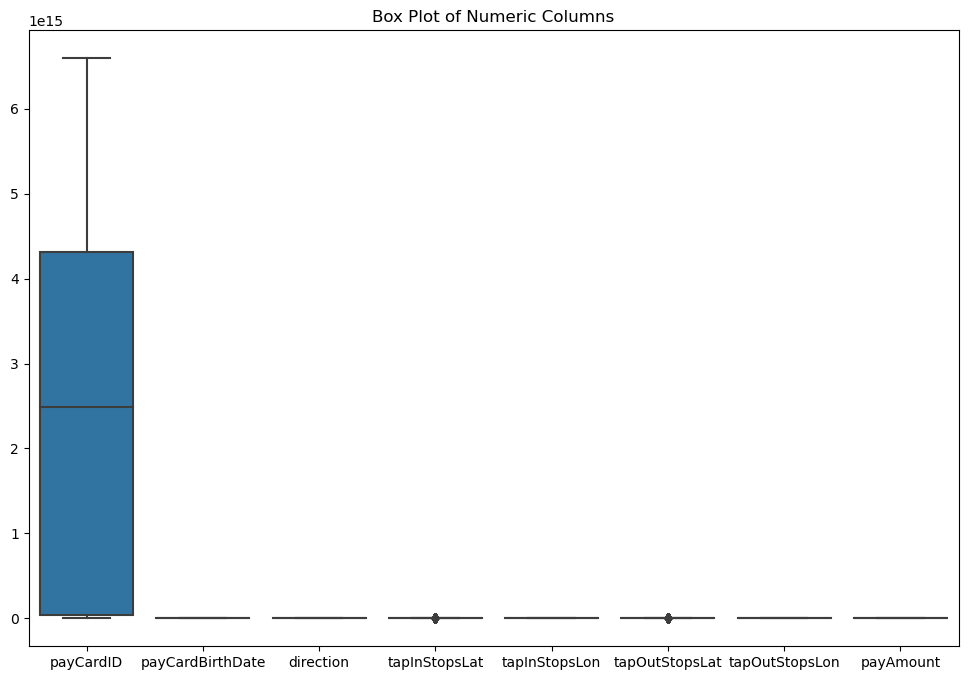

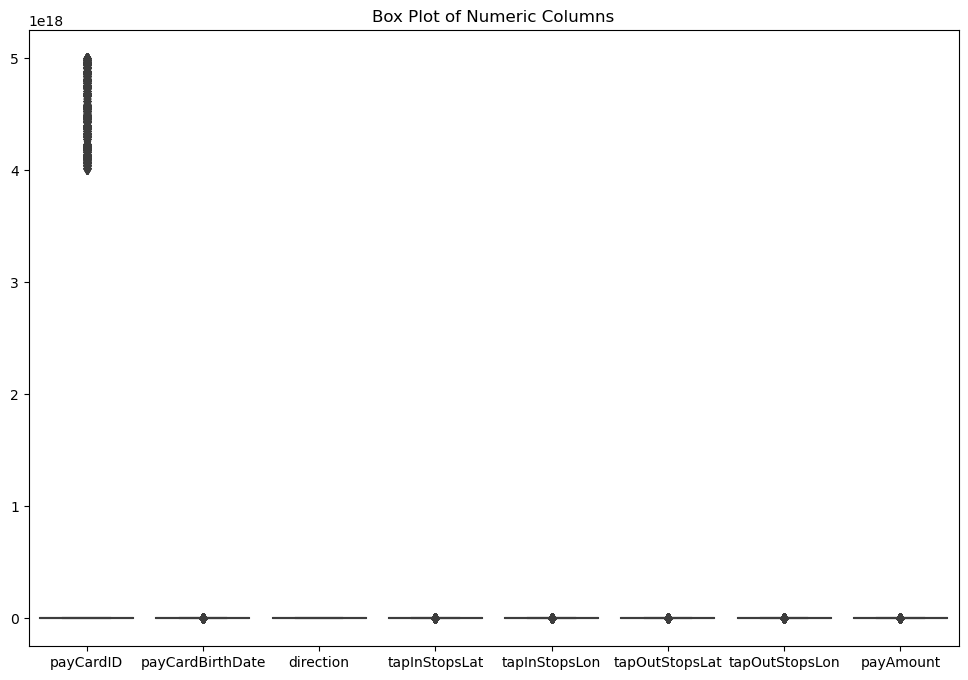

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

# kolom numerik dalam dataframe
numeric_cols = df_no_outliers.select_dtypes(include=['float64', 'int64'])

# box plot untuk setiap kolom numerik
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_cols)
plt.title('Box Plot of Numeric Columns')
plt.show()


# kolom numerik dalam dataframe
numeric_cols2 = df.select_dtypes(include=['float64', 'int64'])

# box plot untuk setiap kolom numerik
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_cols2)
plt.title('Box Plot of Numeric Columns')
plt.show()



#### Catatan tambahan
 Untuk analisis selanjutnya, data outlier tetap disertakan untuk analisis dan eksplorasi data lebih lengkap.
 
 
 Ada `6.000`` outlier dimana ini hampir `20%` dari data. Kalau menggunakan data dengan outlier, artinya kita harus mendelete dan tidak bisa mengeksplorasi data dengan analisis dan insight yang lebih luas. 


### Data cleaned
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [282]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)

(36556, 17)


Sebelum dibersihkan, kita memiliki 37.900 baris data dan 22 kolom, sekarang kita memiliki 36.556 an 17 kolom, karena missing valuenya <6%, yang mana masih tergolong sedikit maka tidak ada data yang dihapus. Melainkan di isi menggunakan data yang modus. 

Kita hanya menghapus kolom yang tidak digunakan dalam analisis data.

# Data Analysis

Dari data Transjakarta ini, ada beberapa insight yang dapat diperoleh adalah:

1. Analisis pola perjalanan penumpang Transjakarta dengan melihat pola tap-in (masuk) dan tap-out (keluar) di koridor (koridor terbanyak dan jam sibuk)
2. Frekuensi Penggunaan kartu untuk transaksi (payCardID)
3. Demografi pelanggan yang menggunakan layanan Transjakarta (gender, usia, tempat tinggal)
4. Anda dapat mencari korelasi antara fitur-fitur seperti jumlah pembayaran (payAmount) dengan rute atau halte yang sering digunakan (corridorID atau tapInStopsName/tapOutStopsName).
5. Anda bisa menganalisis waktu antara tap-in dan tap-out untuk mengidentifikasi pola keterlambatan atau kemacetan dalam perjalanan.
6. Eksplorasi Data Geospasial: Informasi tentang lokasi halte (tapInStopsLat/tapInStopsLon dan tapOutStopsLat/tapOutStopsLon) dapat dimanfaatkan untuk analisis spasial tentang pola perjalanan atau kepadatan penggunaan pada berbagai area.
7. Intensitas rata-rata kedatangan pengguna Bus TransJakarta berdasarkan data tap in - tap out


## Berdasarkan data tap in dan tap out
* Halte mana yang paling ramai saat pelanggan masuk dan keluar?



In [312]:
freq_tap = df.groupby(['tapInStopsName']).size().reset_index(name='frekuensi')
halte_max = freq_tap.loc[freq_tap['frekuensi'].idxmax()]
halte_max

# 10 halte teramai 
top10_tapin = freq_tap.nlargest(10, 'frekuensi')

top10_tapin


,tapInStopsName,frekuensi
1274,Penjaringan,235
272,Garuda Taman Mini,203
52,BKN,163
58,BNN LRT,150
1255,Pejaten,146
1271,Penggilingan,129
165,Cibubur Junction,127
1587,Rusun Kapuk Muara,125
2161,Seskoal,123
2461,Tendean,122


In [320]:
freq_tap = df.groupby(['tapOutStopsName']).size().reset_index(name='frekuensi')
halte_max = freq_tap.loc[freq_tap['frekuensi'].idxmax()]
halte_max

# 10 halte teramai berdasarkan tap in 
top10_tapout = freq_tap.nlargest(10, 'frekuensi')

top10_tapout

,tapOutStopsName,frekuensi
42,BKN,316
1110,Penjaringan,265
2163,Term. Senen,196
1011,Monas,167
2154,Term. Kampung Rambutan,164
789,Kejaksaan Agung,159
1346,Ragunan,151
1154,Pinang Ranti,146
861,Kota Kasablanka,131
1174,Pluit,131


* Rute teramai

In [284]:
top_routes = df['corridorName'].value_counts().head(10)
top_routes

corridorName
Cibubur - Balai Kota                           1462
Ciputat - CSW                                   376
Pulo Gadung - Monas                             333
Harmoni - Jakarta International Stadium         333
Kampung Rambutan - Pondok Gede                  327
Kalideres - Bundaran HI via Veteran             323
Rusun Pondok Bambu - Walikota Jakarta Timur     323
Kebayoran Lama - Tanah Abang                    321
Rusun Rawa Bebek - Kodamar                      307
Pasar Minggu - Tanah Abang                      300
Name: count, dtype: int64

* Rute dengan waktu perjalanan paling panjang

In [285]:
df['WaktuPerjalanan'] = df['tapOutTime'] - df['tapInTime']
df['WaktuPerjalanan'].describe()

count                        36556
mean     0 days 01:12:07.525440420
std      0 days 00:28:04.374704833
min                0 days 00:15:00
25%                0 days 00:51:08
50%                0 days 01:11:50
75%                0 days 01:35:48
max                0 days 02:59:03
Name: WaktuPerjalanan, dtype: object

In [286]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan Anda memiliki kolom 'WaktuPerjalanan', 'tapInStopsName', 'tapOutStopsName'
# dari dataframe Anda.

# Langkah 1: Hitung durasi perjalanan dalam menit
df['Waktu Perjalanan_menit'] = df['WaktuPerjalanan'].dt.seconds / 60

# Langkah 2: Analisis frekuensi lama perjalanan dan rute
frekuensi_lama_perjalanan = pd.cut(df['Waktu Perjalanan_menit'], bins=[0, 30, 60, 90, 120, 150, float('inf')], labels=['0-30', '30-60', '60-90', '90-120', '120-150', '150+'])

# Tambahkan kolom frekuensi lama perjalanan ke dataframe
df['FrekuensiLamaPerjalanan'] = frekuensi_lama_perjalanan

frekuensi_lama_perjalanan

# Sort dataframe berdasarkan waktu perjalanan secara descending
perjalanan_terlama = df.nlargest(5, 'WaktuPerjalanan')

# Tampilkan hasil
print(perjalanan_terlama[['corridorID', 'corridorName', 'WaktuPerjalanan', 'tapInTime','tapOutTime','payCardID']])


      corridorID                         corridorName WaktuPerjalanan  \
37616        10K  Tanjung Priok - Senen via Taman BMW 0 days 02:59:03   
37878        D32            Cinere - Bundaran Senayan 0 days 02:59:03   
37867     JAK.07     Tanah Abang - Grogol via Tawakal 0 days 02:58:58   
37752         10                Tanjung Priok - PGC 2 0 days 02:58:48   
37692        12F    Rusun Marunda - Rusun Waduk Pluit 0 days 02:58:39   

                tapInTime          tapOutTime         payCardID  
37616 2023-04-23 05:36:41 2023-04-23 08:35:44  6011718497540493  
37878 2023-04-16 07:59:08 2023-04-16 10:58:11    36067042340502  
37867 2023-04-03 14:50:57 2023-04-03 17:49:55  3570576233000275  
37752 2023-04-08 06:35:18 2023-04-08 09:34:06   213165965158193  
37692 2023-04-26 07:21:49 2023-04-26 10:20:28  3591646002078433  


### Dari analisis di atas diperoleh:
* Halte teramai adalah Penjaringan dan BKN 
* Rute teramai adalah Cibubur - Balai Kota
* Waktu perjalanan paling lama adalah hampir 3 jam yaitu rute paling lam adalah 10 K dan D 32 

#### Apakah ada korelasi waktu perjalanan dengan koridor?

In [287]:
# cek distribusi kolom usia
from scipy.stats import normaltest
stats, pval=normaltest(df['Waktu Perjalanan_menit'])
if pval<=0.05:
    print('distribusi tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

distribusi tidak normal


#### Karena distribusi tidakk normal dan data yang mau dianalisis adalah data kategorikal. Maka kita menggunakan korelasi spearman.

In [288]:
from scipy.stats import spearmanr

# Hitung Korelasi
correlation_matrix = df.groupby('corridorName')['Waktu Perjalanan_menit'].apply(lambda x: spearmanr(x, x.index)[0]).reset_index()
correlation_matrix.columns = ['corridorName', 'korelasi']

# Tampilkan Matriks Korelasi
print(correlation_matrix)


                                   corridorName  korelasi
0        Andara - Stasiun Universitas Pancasila  0.247695
1                                  BKN - Blok M  0.233310
2                                BSD - Jelambar  0.077738
3                       BSD Serpong - Fatmawati  0.116752
4                             Batusari - Grogol  0.193801
..                                          ...       ...
211        Terminal Rawamangun - Cipinang Muara -0.055667
212          Terminal Tanah Merah - Pulo Gadung  0.236605
213        Terminal Tanjung Priok - Ancol Barat  0.245983
214  Tongtek - Tebet Eco Park (TEP) - Cililitan  0.172774
215         Universitas Indonesia - Lebak Bulus  0.080003

[216 rows x 2 columns]


In [321]:
# Hitung Korelasi dan Uji Signifikansi untuk Setiap Koridor
koridors = df['corridorName'].unique()

for koridor in koridors:
    # Ambil data waktu perjalanan untuk koridor tertentu
    data_koridor = df[df['corridorName'] == koridor]['Waktu Perjalanan_menit']
    
    # Hitung korelasi Spearman dan nilai p
    corr, p_value = spearmanr(data_koridor, data_koridor.index)
    
    # Tampilkan hasil
    print(f"Korelasi Spearman untuk {koridor}: {corr}")
    print(f"Nilai p untuk {koridor}: {p_value}")
    
    # Uji signifikansi
    alpha = 0.05
    if p_value < alpha:
        print(f"Korelasi untuk {koridor} signifikan secara statistik")
    else:
        print(f"Tidak ada bukti signifikansi korelasi untuk {koridor}")
    
    print('-' * 50)

Korelasi Spearman untuk Pulo Gebang - Pulo Gadung 2 via PIK: 0.3051445065369773
Nilai p untuk Pulo Gebang - Pulo Gadung 2 via PIK: 4.921915809528846e-06
Korelasi untuk Pulo Gebang - Pulo Gadung 2 via PIK signifikan secara statistik
--------------------------------------------------
Korelasi Spearman untuk Kampung Rambutan - Ragunan: 0.11533926714017195
Nilai p untuk Kampung Rambutan - Ragunan: 0.27359200497231956
Tidak ada bukti signifikansi korelasi untuk Kampung Rambutan - Ragunan
--------------------------------------------------
Korelasi Spearman untuk Harmoni - Jakarta International Stadium: 0.135392486332336
Nilai p untuk Harmoni - Jakarta International Stadium: 0.013406404248626925
Korelasi untuk Harmoni - Jakarta International Stadium signifikan secara statistik
--------------------------------------------------
Korelasi Spearman untuk PGC - Juanda: 0.24563860500181064
Nilai p untuk PGC - Juanda: 0.0001377873479942716
Korelasi untuk PGC - Juanda signifikan secara statistik
----

Hasil uji korelasi beragam ada yang berkorelasi dan ada yang tidak berkolerasi. 

`Kalau tidak ada korelasi`, maka menunjukkan bahwa perubahan dalam waktu perjalanan tidak berpengaruh secara signifikan pada perbedaan dalam rute Transjakarta. 
`Kalau yang berkolerasi`, maka waktu perjalanan dapat diatributkan secara signifikan pada perbedaan dalam rute Transjakarta. Ini dapat menjadi dasar untuk mengambil tindakan atau membuat keputusan terkait untuk `evaluasi rute` atau peningkatan layanan guna mengurangi waktu perjalanan.

Jika korelasi positif terdapat antara waktu perjalanan dan koridor, hal itu bisa menunjukkan bahwa semakin jauh koridor, semakin lama waktu perjalanan. 

Sebaliknya, korelasi negatif menunjukkan bahwa semakin dekat koridor, semakin lama waktu perjalanan. Ini dapat membantu dalam perencanaan rute dan estimasi waktu perjalanan.


## Bedasarkan data `Demografi`

* Pelanggan Transjakarta di dominasi oleh jenis kelamin apa?

In [293]:
import plotly.express as px

# Menghitung jumlah masing-masing jenis kelamin
gender_counts = df['payCardSex'].value_counts()

# Membuat dataframe untuk pie chart
gender_df = pd.DataFrame({'Gender': gender_counts.index, 'Count': gender_counts.values})

# Membuat pie chart interaktif dengan Plotly
fig = px.pie(gender_df, values='Count', names='Gender', title='Proporsi Jenis Kelamin Pengguna Layanan Transjakarta')
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()


Berdasarkan `paycardID`
* Berapa persentase metode pembayaran di layanan Transjakarta?

In [322]:
# Hitung frekuensi penggunaan kartu
paycard_counts = df['payCardBank'].value_counts().reset_index()
paycard_counts.columns = ['payCardBank', 'Count']

# Buat pie chart interaktif dengan Plotly
fig = px.pie(paycard_counts, values='Count', names='payCardBank', title='Persentase Metode Pembayaran di Layanan Transjakarta')
fig.show()


Berdasarkan `payCardBirthDate`
* Berapa rentang umur pelanggan di layanan Transjakarta?

In [323]:
current_year = pd.to_datetime('now').year
df['Age'] = current_year - df['payCardBirthDate'].astype(int)
df.head(4)


,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,...,Waktu Perjalanan_menit,FrekuensiLamaPerjalanan,Age,AgeGroup,Hour,Day,JumlahTapIn,Tanggal Tap In,Jam Tap In,jenis_layanan
37751,213107623841273,emoney,Natalia Pratama,M,1964,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,United Tractors 1,-6.183260,...,113.300000,90-120,60,Dewasa (26-60 tahun),6,Saturday,1,2023-04-01,06:22:27,Reguler
37866,4139531858845,online,Tgk. Kacung Nashiruddin,F,1997,7E,Kampung Rambutan - Ragunan,1.0,Jln. Gabus Raya,-6.301222,...,32.933333,30-60,27,Dewasa (26-60 tahun),6,Saturday,1,2023-04-01,06:54:35,Reguler
37722,60459139923,flazz,Zelda Thamrin,M,1972,JIS3,Harmoni - Jakarta International Stadium,0.0,Danau Agung,-6.146869,...,43.200000,30-60,52,Dewasa (26-60 tahun),7,Saturday,1,2023-04-01,07:32:50,Reguler
37683,4301046448643115806,brizzi,Rama Firmansyah,F,1992,5C,PGC - Juanda,0.0,BKN,-6.257751,...,46.550000,30-60,32,Dewasa (26-60 tahun),9,Saturday,1,2023-04-01,09:41:03,Reguler


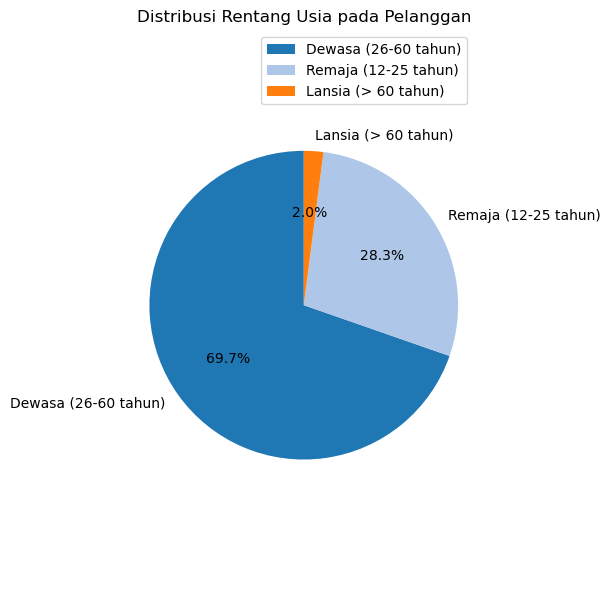

In [296]:
# Mendefinisikan fungsi untuk mengkategorikan usia
def categorize_age(year):
    if 5 <= (pd.to_datetime('now').year - year) <= 11:
        return 'Kanak-Kanak (5-11 tahun)'
    elif 12 <= (pd.to_datetime('now').year - year) <= 25:
        return 'Remaja (12-25 tahun)'
    elif 26 <= (pd.to_datetime('now').year - year) <= 60:
        return 'Dewasa (26-60 tahun)'
    elif 46 <= (pd.to_datetime('now').year - year) <= 80:
        return 'Lansia (> 60 tahun)'
    else:
        return 'Usia Tidak Terkategori'

# Membuat kolom baru dengan kategori usia
df['AgeGroup'] = df['payCardBirthDate'].apply(categorize_age)

# Menghitung jumlah dalam setiap kategori usia
age_group_counts = df['AgeGroup'].value_counts()

# Membuat grafik pie untuk distribusi usia
plt.figure(figsize=(6, 6))
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Distribusi Rentang Usia pada Pelanggan')
plt.ylabel('')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()


* Waktu yang paling sering digunakan untuk melakukan perjalanan?

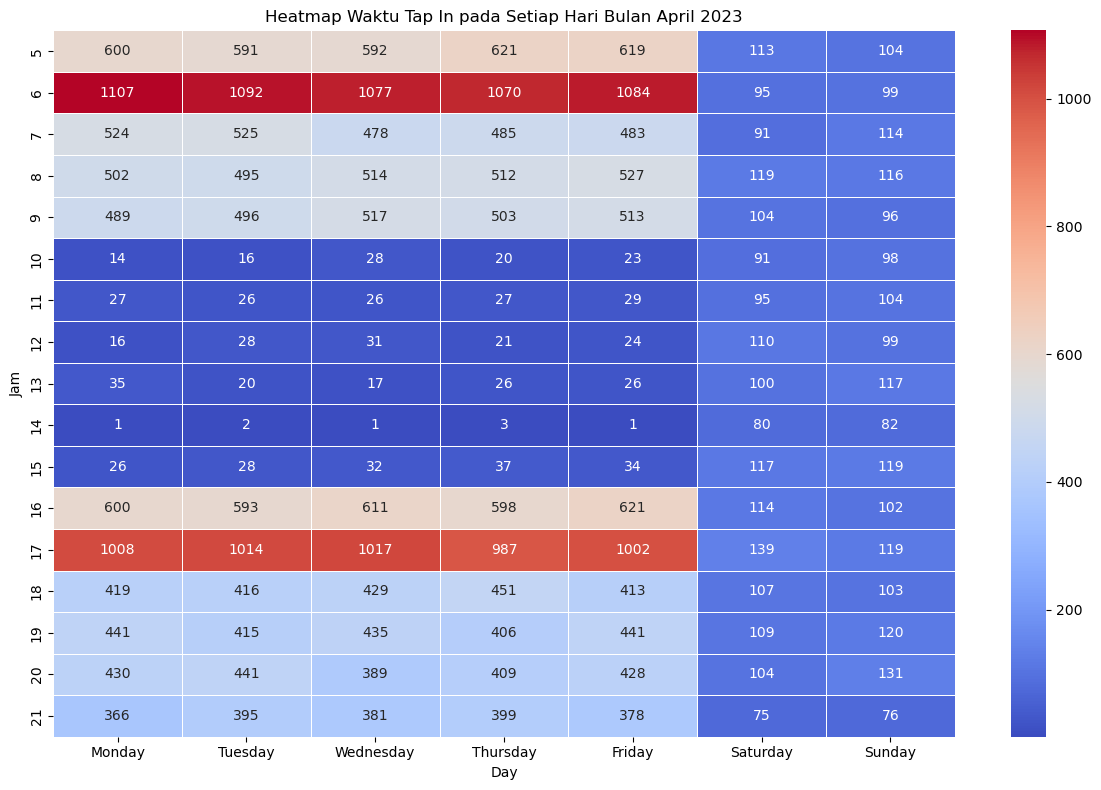

In [297]:
# Ekstrak informasi waktu
df['Hour'] = df['tapInTime'].dt.hour
df['Day'] = df['tapInTime'].dt.day_name()

# Hitung jumlah tap in pada setiap waktu
df['JumlahTapIn'] = 1  # Ini hanya untuk menunjukkan jumlah tap in pada setiap baris

# Buat pivot table dengan jumlah tap in pada setiap jam setiap hari
pivot_data = df.pivot_table(index='Hour', columns='Day', values='JumlahTapIn', aggfunc='sum')

# Urutkan hari agar urut pada heatmap
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_data = pivot_data.reindex(columns=days_order)

# Buat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt='g', linewidths=0.5)
plt.title('Heatmap Waktu Tap In pada Setiap Hari Bulan April 2023')
plt.ylabel('Jam')
plt.tight_layout()
plt.show()


In [298]:
# Konversi kolom 'tapInTime' ke tipe data datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

# Membuat kolom terpisah untuk tanggal dan jam
df['Tanggal Tap In'] = df['tapInTime'].dt.date
df['Jam Tap In'] = df['tapInTime'].dt.time

df = df.sort_values(by=['Tanggal Tap In', 'Jam Tap In'])

In [299]:
# Menghitung frekuensi kemunculan setiap kombinasi paycardID dan paycardName
top_customers = df.groupby(['payCardID', 'payCardName']).size().reset_index(name='frequency')
top_customers = top_customers.sort_values(by='frequency', ascending=False).head(10)

print("Top 10 Pelanggan yang Paling Sering Menggunakan Transjakarta:")
print(top_customers)

Top 10 Pelanggan yang Paling Sering Menggunakan Transjakarta:
             payCardID                   payCardName  frequency
994   3504648028041755              Balidin Ardianto         40
1497  4661843359109266               Galih Budiyanto         40
1232  3580401035990896        T. Dadap Pradana, M.Ak         40
199      4205984560392     T. Baktiadi Prakasa, S.H.         40
1219  3575787320226609  KH. Argono Nashiruddin, S.Gz         40
211      4281653494791                  Zelda Wibowo         40
212      4290559479079                  Lutfan Hakim         40
1178  3562084958981605           Cakrawangsa Permadi         40
1150  3552994986533131              Gilang Iswahyudi         40
1129  3546736957468063             Gambira Handayani         40


*Reguler tariff* 
05.00 - 07.00 WIB = 2.000 (economic tariff)
07.00 - 24.00 WIB = 3.500 
24.00 - 05.00 WIB = 3.500 
(https://transjakarta.co.id/produk-dan-layanan/info-tiket/)

*Royaltrans tariff*
Rp20.000 (https://news.detik.com/berita/d-6891014/transjakarta-tarif-bus-royaltrans-tetap-rp-20-000)

*Mikrotrans tariff*
Rp0 (https://glints.com/id/lowongan/mikrotrans-adalah/)

In [300]:
# Fungsi untuk mengkategorisasikan layanan berdasarkan harga
def kategorikan_layanan(harga):
    if harga == 3500:
        return 'Reguler'
    elif harga == 20000:
        return 'Royaltrans'
    elif harga == 0:
        return 'Mikrotrans'
    else:
        return 'Layanan Lain'

# Membuat kolom baru 'jenis_layanan' berdasarkan harga
df['jenis_layanan'] = df['payAmount'].apply(kategorikan_layanan)

In [301]:
import plotly.express as px

# Konversi hasil perhitungan frekuensi ke DataFrame
payamount_counts = df['jenis_layanan'].value_counts().reset_index()
payamount_counts.columns = ['jenis_layanan', 'Count']

# Buat pie chart interaktif dengan Plotly
fig = px.pie(payamount_counts, values='Count', names='jenis_layanan', title='Layanan yang sering digunakan oleh pelanggan Transjakarta')
fig.show()

In [302]:
# df.to_excel('Transjakarta April 2023_new.xlsx', index= False)

Grafik jumlah penumpang selama bulan April 2023
* Membuat grafik data pelanggan di setiap layanan 

<Figure size 2000x600 with 0 Axes>

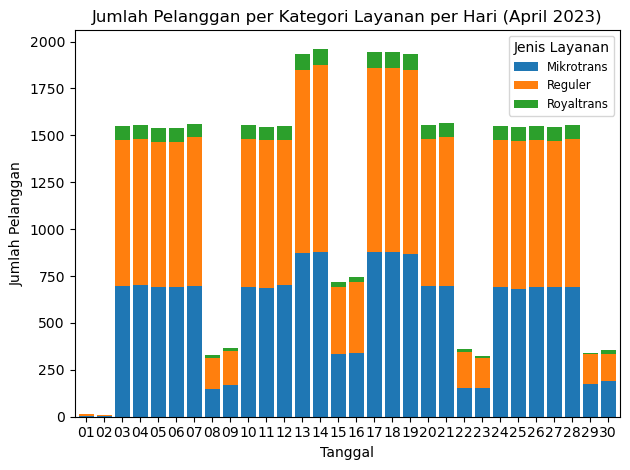

In [303]:
grouped_data = df.groupby(['Tanggal Tap In', 'jenis_layanan']).size().unstack()

# # Visualisasi menggunakan stack bar
plt.figure(figsize=(20, 6))
grouped_data.plot(kind='bar', stacked=True, width= 0.8)

plt.title('Jumlah Pelanggan per Kategori Layanan per Hari (April 2023)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pelanggan')

# Mengatur label tanggal tanpa bulan dan tahun
formatted_labels = [date.strftime("%d") for date in grouped_data.index]
plt.xticks(range(len(grouped_data.index)), formatted_labels, rotation=0)

plt.legend(title='Jenis Layanan', fontsize='small')
plt.tight_layout()
plt.show()

#### Berdasarkan analisis diatas, diperoleh: 
* Penumpang Transjakarta umumnya berjenis kelamin perempuan. 
* Frekuensi penggunaan kartu di layanan Transjakarta di mayoritas kan oleh DKI.
* Pelanggan Transjakarta juga didominasi oleh penumpang dewasa (26-60 tahun)
* Waktu yang paling sering digunakan oleh pelanggan untuk melakukan perjalanan di pagi pada 06.00 dan di sore pukul 07.00 → berangkat dan pulang kerja, 
* Kita bisa juga identifikasi 10 pelanggan yang sering menggunakan Transjakarta selama 1 bulan → dimana frekuensinya 40 kali dalam 1 bulan dimana bisa diasumsikan pelanggan 2x melakukan perjalanan saat pagi di berangkat kerja dan sore saat pulang kerja.
* Berdasarkan tarif kita juga bisa melihat layanan mana saja yang sering digunakan oleh penumpang Transjakarta,
* Diasumsikan bahwa tarif 3500 merupakan tarif reguler, tarif 2000 merupakan tarif royal trans, dan tarif 0 merupakan tarif mikro trans. Yang mana 50% yang paling diminati pelanggan adalah layanan reguler.

Dari data-data tersebut kita bisa melihat korelasi antara jenis transaksi yang digunakan oleh pelanggan dengan kelompok umur 26 - 60 tahun (dewasa):

In [306]:
# Filter data hanya untuk lansia
dewasa_data = df[df['AgeGroup'] == 'Dewasa (26-60 tahun)']

# Hitung Korelasi
correlation_matrix_dewasa = dewasa_data.groupby('payCardBank')['Age'].apply(lambda x: spearmanr(x, x.index)[0]).reset_index()
correlation_matrix_dewasa.columns = ['payCardBank', 'korelasi']

# Tampilkan Matriks Korelasi untuk Lansia
print(correlation_matrix_dewasa)

  payCardBank  korelasi
0         bni -0.025829
1      brizzi  0.087450
2         dki  0.045696
3      emoney  0.045576
4       flazz -0.125512
5      online  0.012905


In [307]:
# Hitung Korelasi dan Uji Signifikansi untuk Setiap Koridor
card = df['payCardBank'].unique()

for card in card:
    # Ambil data waktu perjalanan untuk jenis transaksi
    data_card = df[df['payCardBank'] == card]['Age']
    
    # Hitung korelasi Spearman dan nilai p
    corr, p_value = spearmanr(data_card, data_card.index)
    
    # Tampilkan hasil
    print(f"Korelasi Spearman untuk {card}: {corr}")
    print(f"Nilai p untuk {card}: {p_value}")
    
    # Uji signifikansi
    alpha = 0.05
    if p_value < alpha:
        print(f"Korelasi untuk {card} signifikan secara statistik")
    else:
        print(f"Tidak ada bukti signifikansi korelasi untuk {card}")
    
    print('-' * 50)

Korelasi Spearman untuk emoney: -0.05521586496418258
Nilai p untuk emoney: 6.745049358499412e-06
Korelasi untuk emoney signifikan secara statistik
--------------------------------------------------
Korelasi Spearman untuk online: 0.07854655920720671
Nilai p untuk online: 3.4394034539135e-05
Korelasi untuk online signifikan secara statistik
--------------------------------------------------
Korelasi Spearman untuk flazz: -0.08852891070038886
Nilai p untuk flazz: 7.749692064444839e-07
Korelasi untuk flazz signifikan secara statistik
--------------------------------------------------
Korelasi Spearman untuk brizzi: 0.10083070751726388
Nilai p untuk brizzi: 3.8702016285397096e-09
Korelasi untuk brizzi signifikan secara statistik
--------------------------------------------------
Korelasi Spearman untuk dki: 0.003351069138573353
Nilai p untuk dki: 0.652503542502719
Tidak ada bukti signifikansi korelasi untuk dki
--------------------------------------------------
Korelasi Spearman untuk bni:

Hasil uji statistik diatas, menunjukan bahwa tidak ada bukti signifikasi korelasi untuk DKI, namun berkolerasi untuk jenis transaksi lainnya yaitu emoney, online, flazz, brizzi, dki, bni yang amna memiliki hubungan yan signifikan antara metode transaksi pembayaran  dan kelompok pelanggan dewasa.

Dimana korelasi ini bisa diimplikasikan bahwa metode transaksi tertentu  kurang umum di antara pelanggan dewasa. Informasi ini dapat digunakan untuk menyusun strategi pemasaran atau penyesuaian layanan yang lebih sesuai dengan preferensi pelanggan dewasa.

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan bahwa:

Layanan Transjakarta saat ini:
* Halte teramai adalah halte penjaringan dan BKN. 
* Koridor teramai adalah Cibubur - Balaikota, yang mana koridor ini merupakan layanan Royaltrans. 
* Waktu perjalanan penumpang saat ini bisa mencapai 3 jam. 
* Beberapa koridor, perlu ada evaluasi untuk mengurangi waktu perjalanan 

Karakteristik pelanggan Transjakarta:
* Mayoritas pelanggan adalah dengan jenis kelamin perempuan. 
* Metode transaksi yang banyak digunakan adalah bank DKI. 
* Pelanggan Transjakarta juga didominasi oleh penumpang dewasa dengan rentang umur 26-60 tahun
* Waktu yang paling sering digunakan oleh pelanggan untuk melakukan perjalanan di pagi pada 06.00 dan di sore pukul 07.00 → berangkat dan pulang kerja. 
* Mayoritas layanan yang paling banyak diminati pelanggan adalah layanan Reguler. 



**Rekomendasi**

Cara meningkatkan jumlah pelanggan Transjakarta dan meningkatkan kepuasan pelanggan saat menggunakan layanan Transjakarta:

1. Penambahan petugas halte terutama di halte ramai pelanggan dan di jam sibuk agar dapat mengatur penumpang.
2. Penambahan bus untuk rute dengan jumlah pelanggan terbanyak dan mempersempit headway bus dan juga memperbanyak frekuensi bus terutama pada jam-jam sibuk agar waktu tunggu bus tidak terlalu lama.  
3. Untuk meningkatkan efisiensi waktu perjalanan, Transjakarta dapat mempertimbangkan rekomendasi berikut:
   * Evaluasi dan sesuaikan rute bus untuk meminimalkan kemungkinan macet atau jalan yang lambat.
   * Tingkatkan frekuensi layanan bus pada rute yang sering mengalami kemacetan untuk mengurangi waktu tunggu penumpang.
   * Perbarui sistem informasi penumpang untuk memberikan estimasi waktu perjalanan yang lebih akurat dan informasi terkini mengenai kondisi lalu lintas melalui aplikasi yang informasinya bisa diakses secara realtime oleh penumpang.
4. Dengan jumlah pelanggan yang didominasi oleh perempuan dan didominasi oleh orang dewasa maka perlu adanya penambahan bus dan ruang khusus perempuan di setiap bus layanan Transjakarta. Saat ini, Transjakarta memiliki bus pink yang hanya ada di beberapa koridor tertentu saja yaitu koridor 2, koridor 3, koridor 9, koridor 13 dan koridor 5. Maka bisa dilakukan penambahan di semua koridor dan layanan khususnya di koridor ramai pelanggan. 
5. Mayoritas metode pembayaran pelanggan adalah bank DKI, hal ini menunjukkan bahwa mayoritas pelanggan Transjakarta adalah pengguna bank DKI. Di halte Transjakarta ada vending machine yang menjual kartu. Transjakarta harus menyediakan kartu bank DKI lebih banyak dibandingkan dengan jenis kartu lainnya atau lebih mempromosikan metode pembayaran lainnya kepada pelanggan. 
6. Layanan yang sering digunakan oleh pelanggan adalah layanan reguler, layanan reguler juga harus disediakan armada yang banyak karena minatnya banyak dibandingkan layanan lainnya agar waktu tunggu penumpang tidak lama dan load factor bus tidak melebihi kapasitas.